1. IMPORTACION Y CARGA DE DATOS

In [1]:
%load_ext pycodestyle_magic

In [2]:
import pandas as pd
%pycodestyle_on

# Cargamos los archivoa descargadoa de Netflix en dos dataframe
df1 = pd.read_csv(r'data\NetflixViewingHistory.csv')
df2 = pd.read_csv(r'data\NetflixViewingHistory2.csv')

# Unimos los dos dataframes
df = pd.concat([df1, df2], axis=0)

2. ANALISIS EXPLORATORIO

In [3]:
# Comprobamos el número de filas y columnas que tiene nuestro df
df.shape

(536, 2)

In [4]:
# Obtenemos más info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   536 non-null    object
 1   Date    536 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [5]:
# Extraemos las 10 primeras filas
df.head(10)

,Title,Date
0,Rencor tatuado,9/8/21
1,El vicio del poder,6/8/21
2,Molly's Game,28/7/21
3,Historia de un crimen: Colmenares: Temporada 1...,23/7/21
4,Historia de un crimen: Colmenares: Temporada 1...,23/7/21
5,En la ciénaga: Episodio 1,23/7/21
6,En la ciénaga: En la ciénaga 1997: Episodio 1,23/7/21
7,Audrie y Daisy,1/7/21
8,Sophie: Un asesinato en Cork: Miniserie: El mu...,1/7/21
9,Ola de crímenes,30/6/21


Observamos que existe un patrón en el que diferentes partes se separan mediante ":". Vamos a contar en cuantas partes
se separan nuestros contenidos

Separaremos las partes por el patron ":" y seleccionaremos "expand = False"
ya que lo que queremos es que las partes se queden en la columna "Title".
Si pusieramos "expand = True" nos separaria las partes asignando una nueva columna para cada una de ellas.
Finalmente lo transformamos en un dataframe mediante ".to_frame()"

In [6]:
separacion_lista = df.Title.str.split(pat=":", expand=False).to_frame()
separacion_lista

,Title
0,[Rencor tatuado]
1,[El vicio del poder]
2,[Molly's Game]
3,"[Historia de un crimen, Colmenares, Temporad..."
4,"[Historia de un crimen, Colmenares, Temporad..."
...,...
121,"[JU-ON, Orígenes, Temporada 1, Episodio 5]"
122,"[JU-ON, Orígenes, Temporada 1, Episodio 4]"
123,"[JU-ON, Orígenes, Temporada 1, Episodio 3]"
124,"[JU-ON, Orígenes, Temporada 1, Episodio 2]"


Añadimos una nueva columna al df "separacion_lista" llamada "num_partes" y calculamos los elementos que hay en las listas
que hemos generado en cada una de las filas de la columna "Title".

In [7]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,[Rencor tatuado],1
1,[El vicio del poder],1
2,[Molly's Game],1
3,"[Historia de un crimen, Colmenares, Temporad...",4
4,"[Historia de un crimen, Colmenares, Temporad...",4
...,...,...
121,"[JU-ON, Orígenes, Temporada 1, Episodio 5]",4
122,"[JU-ON, Orígenes, Temporada 1, Episodio 4]",4
123,"[JU-ON, Orígenes, Temporada 1, Episodio 3]",4
124,"[JU-ON, Orígenes, Temporada 1, Episodio 2]",4


In [8]:
# Contamos el número de veces que aparecen los valores
# de la columna num_partes
separacion_lista.num_partes.value_counts()

3    403
4     82
1     38
2     12
5      1
Name: num_partes, dtype: int64

Vamos a analizar los titulos por número de partes por si vemos algún patrón.

In [9]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
0,[Rencor tatuado],1
1,[El vicio del poder],1
2,[Molly's Game],1
7,[Audrie y Daisy],1
9,[Ola de crímenes],1
10,[One of Us],1
11,[Te doy mis ojos],1
12,[El caso Wanninkhof - Carabantes],1
13,[ROMA],1
14,[Out of Thin Air],1


In [10]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
5,"[En la ciénaga, Episodio 1]",2
17,"[Nail Bomber, Manhunt]",2
26,"[Crack, Cocaína, corrupción y conspiración]",2
63,"[El caso Watts, El padre homicida]",2
75,"[Disclosure, Ser trans en Hollywood]",2
223,"[Ricky Gervais, Humanity]",2
277,"[Minimalismo, las cosas importantes]",2
320,"[Moneyball, Rompiendo las reglas]",2
365,"[Oprah Winfrey presenta, Así nos ven ahora]",2
0,"[Héroes, Silencio y rock & roll]",2


In [11]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
6,"[En la ciénaga, En la ciénaga 1997, Episodio 1]",3
22,"[El imputado de la habitación 2806, Miniserie...",3
23,"[Nevenka, Miniserie, Episodio 3]",3
24,"[Nevenka, Miniserie, Episodio 2]",3
25,"[Nevenka, Miniserie, Episodio 1]",3
30,"[A un instante del terror, Temporada 1, Terr...",3
40,"[HERO MASK, Parte 1, Episodio 1]",3
41,"[El desorden que dejas, Miniserie, El desord...",3
42,"[El desorden que dejas, Miniserie, La tercer...",3
43,"[El desorden que dejas, Miniserie, Lo que no...",3


In [12]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
3,"[Historia de un crimen, Colmenares, Temporad...",4
4,"[Historia de un crimen, Colmenares, Temporad...",4
8,"[Sophie, Un asesinato en Cork, Miniserie, E...",4
18,"[Los hijos de Sam, Un descenso a los infierno...",4
20,"[Esto es un atraco, El mayor robo de arte del...",4
27,"[Escena del crimen, Desaparición en el hotel ...",4
28,"[Escena del crimen, Desaparición en el hotel ...",4
29,"[Escena del crimen, Desaparición en el hotel ...",4
31,"[Conversaciones con asesinos, Las cintas de T...",4
32,"[Conversaciones con asesinos, Las cintas de T...",4


In [13]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

,Title,num_partes
23,"[Terrorismo, Ataques frustrados, Temporada 1...",5


3. CREACIÓN DE VARIABLES

3.1. VARIABLES DERIVADAS DEL TÍTULO

Añadimos a nuestro df una nueva columna llamada "tipo". Si el número de la columna
"num_partes" es menor a 3 asignaremos el tipo "película" y si no le asignaremos el tipo "serie" ya que en general
los grupos con 3 o más partes suelen ser series.

In [14]:
import numpy as np

# Utilizamos where para establecer la condición y el resultado
# si se cumple o no.

separacion_lista['tipo'] = np.where(
        separacion_lista.num_partes < 3, 'película', 'serie')
separacion_lista

,Title,num_partes,tipo
0,[Rencor tatuado],1,película
1,[El vicio del poder],1,película
2,[Molly's Game],1,película
3,"[Historia de un crimen, Colmenares, Temporad...",4,serie
4,"[Historia de un crimen, Colmenares, Temporad...",4,serie
...,...,...,...
121,"[JU-ON, Orígenes, Temporada 1, Episodio 5]",4,serie
122,"[JU-ON, Orígenes, Temporada 1, Episodio 4]",4,serie
123,"[JU-ON, Orígenes, Temporada 1, Episodio 3]",4,serie
124,"[JU-ON, Orígenes, Temporada 1, Episodio 2]",4,serie


Agregamos la variable "tipo" del df "separacion_lista"
a nuestro df principal concatenando el df principal
junto con la columna "tipo" del dataframe "separación_lista"

In [15]:
df = pd.concat([df, separacion_lista['tipo']], axis=1)
df

,Title,Date,tipo
0,Rencor tatuado,9/8/21,película
1,El vicio del poder,6/8/21,película
2,Molly's Game,28/7/21,película
3,Historia de un crimen: Colmenares: Temporada 1...,23/7/21,serie
4,Historia de un crimen: Colmenares: Temporada 1...,23/7/21,serie
...,...,...,...
121,JU-ON: Orígenes: Temporada 1: Episodio 5,5/8/20,serie
122,JU-ON: Orígenes: Temporada 1: Episodio 4,4/8/20,serie
123,JU-ON: Orígenes: Temporada 1: Episodio 3,4/8/20,serie
124,JU-ON: Orígenes: Temporada 1: Episodio 2,3/8/20,serie


In [16]:
# Dividimos los títulos en diferentes niveles para así generar
# nuevas variables. Ahora si utilizamos "True" para que cada
# parte se convierta en una columna.

separacion_cols = df.Title.str.split(pat=':', expand=True)
separacion_cols

,0,1,2,3,4
0,Rencor tatuado,None,None,None,None
1,El vicio del poder,None,None,None,None
2,Molly's Game,None,None,None,None
3,Historia de un crimen,Colmenares,Temporada 1,Una madre busca justicia,None
4,Historia de un crimen,Colmenares,Temporada 1,La noche oscura de Halloween,None
...,...,...,...,...,...
121,JU-ON,Orígenes,Temporada 1,Episodio 5,None
122,JU-ON,Orígenes,Temporada 1,Episodio 4,None
123,JU-ON,Orígenes,Temporada 1,Episodio 3,None
124,JU-ON,Orígenes,Temporada 1,Episodio 2,None


In [17]:
# Renombramos las columnas

separacion_cols.columns = ['nivel1', 'nivel2', 'nivel3', 'nivel4', 'nivel5']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5
0,Rencor tatuado,None,None,None,None
1,El vicio del poder,None,None,None,None
2,Molly's Game,None,None,None,None
3,Historia de un crimen,Colmenares,Temporada 1,Una madre busca justicia,None
4,Historia de un crimen,Colmenares,Temporada 1,La noche oscura de Halloween,None
...,...,...,...,...,...
121,JU-ON,Orígenes,Temporada 1,Episodio 5,None
122,JU-ON,Orígenes,Temporada 1,Episodio 4,None
123,JU-ON,Orígenes,Temporada 1,Episodio 3,None
124,JU-ON,Orígenes,Temporada 1,Episodio 2,None


In [18]:
# Copiamos estas nuevas variables en el dataframe inicial, df
# utilizando de nuevo "concat"
df = pd.concat([df, separacion_cols], axis=1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Rencor tatuado,9/8/21,película,Rencor tatuado,None,None,None,None
1,El vicio del poder,6/8/21,película,El vicio del poder,None,None,None,None
2,Molly's Game,28/7/21,película,Molly's Game,None,None,None,None
3,Historia de un crimen: Colmenares: Temporada 1...,23/7/21,serie,Historia de un crimen,Colmenares,Temporada 1,Una madre busca justicia,None
4,Historia de un crimen: Colmenares: Temporada 1...,23/7/21,serie,Historia de un crimen,Colmenares,Temporada 1,La noche oscura de Halloween,None
...,...,...,...,...,...,...,...,...
121,JU-ON: Orígenes: Temporada 1: Episodio 5,5/8/20,serie,JU-ON,Orígenes,Temporada 1,Episodio 5,None
122,JU-ON: Orígenes: Temporada 1: Episodio 4,4/8/20,serie,JU-ON,Orígenes,Temporada 1,Episodio 4,None
123,JU-ON: Orígenes: Temporada 1: Episodio 3,4/8/20,serie,JU-ON,Orígenes,Temporada 1,Episodio 3,None
124,JU-ON: Orígenes: Temporada 1: Episodio 2,3/8/20,serie,JU-ON,Orígenes,Temporada 1,Episodio 2,None


3.2 VARIABLES DERIVADAS DE LA FECHA

Para poder sacar más jugo a nuestro dataset necesitamos jugar con las fechas. de esta manera podremos saber el día de la semana o el més en el que vimos el contenido.

In [19]:
# Creamos una nueva variable llamada "fecha" y asignamos los valores
# de la columna "date" pero convirtiendolos en formato fecha.
df['fecha'] = pd.to_datetime(df.Date)

# Eliminamos la variable "Date"
df.drop(columns='Date', inplace=True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,fecha
0,Rencor tatuado,película,Rencor tatuado,None,None,None,None,2021-09-08
1,El vicio del poder,película,El vicio del poder,None,None,None,None,2021-06-08
2,Molly's Game,película,Molly's Game,None,None,None,None,2021-07-28
3,Historia de un crimen: Colmenares: Temporada 1...,serie,Historia de un crimen,Colmenares,Temporada 1,Una madre busca justicia,None,2021-07-23
4,Historia de un crimen: Colmenares: Temporada 1...,serie,Historia de un crimen,Colmenares,Temporada 1,La noche oscura de Halloween,None,2021-07-23
...,...,...,...,...,...,...,...,...
121,JU-ON: Orígenes: Temporada 1: Episodio 5,serie,JU-ON,Orígenes,Temporada 1,Episodio 5,None,2020-05-08
122,JU-ON: Orígenes: Temporada 1: Episodio 4,serie,JU-ON,Orígenes,Temporada 1,Episodio 4,None,2020-04-08
123,JU-ON: Orígenes: Temporada 1: Episodio 3,serie,JU-ON,Orígenes,Temporada 1,Episodio 3,None,2020-04-08
124,JU-ON: Orígenes: Temporada 1: Episodio 2,serie,JU-ON,Orígenes,Temporada 1,Episodio 2,None,2020-03-08


In [20]:
# Comprobamos que Pandas ve "fecha" con formato fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 125
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   536 non-null    object        
 1   tipo    536 non-null    object        
 2   nivel1  536 non-null    object        
 3   nivel2  498 non-null    object        
 4   nivel3  486 non-null    object        
 5   nivel4  83 non-null     object        
 6   nivel5  1 non-null      object        
 7   fecha   536 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 37.7+ KB


In [21]:
# Pasamos la fecha como índice
df.set_index('fecha', inplace=True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5
fecha,,,,,,,
2021-09-08,Rencor tatuado,película,Rencor tatuado,None,None,None,None
2021-06-08,El vicio del poder,película,El vicio del poder,None,None,None,None
2021-07-28,Molly's Game,película,Molly's Game,None,None,None,None
2021-07-23,Historia de un crimen: Colmenares: Temporada 1...,serie,Historia de un crimen,Colmenares,Temporada 1,Una madre busca justicia,None
2021-07-23,Historia de un crimen: Colmenares: Temporada 1...,serie,Historia de un crimen,Colmenares,Temporada 1,La noche oscura de Halloween,None
...,...,...,...,...,...,...,...
2020-05-08,JU-ON: Orígenes: Temporada 1: Episodio 5,serie,JU-ON,Orígenes,Temporada 1,Episodio 5,None
2020-04-08,JU-ON: Orígenes: Temporada 1: Episodio 4,serie,JU-ON,Orígenes,Temporada 1,Episodio 4,None
2020-04-08,JU-ON: Orígenes: Temporada 1: Episodio 3,serie,JU-ON,Orígenes,Temporada 1,Episodio 3,None


In [22]:
# Creamos nuevas variables a partir de la fecha mediante una funcion.

def atributos_fechas(data):
    """Devuelve:
        año
        nombre del mes
        més formato numérico
        nombre del día de la semana
        data -- dataframe
        """
    data['año'] = data.index.year
    data['mes'] = data.index.month_name()
    data['dia_mes'] = data.index.day
    data['dia_semana'] = data.index.day_name()
    return(data)

In [23]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2021-09-08,Rencor tatuado,película,Rencor tatuado,None,None,None,None,2021,September,8,Wednesday
2021-06-08,El vicio del poder,película,El vicio del poder,None,None,None,None,2021,June,8,Tuesday
2021-07-28,Molly's Game,película,Molly's Game,None,None,None,None,2021,July,28,Wednesday
2021-07-23,Historia de un crimen: Colmenares: Temporada 1...,serie,Historia de un crimen,Colmenares,Temporada 1,Una madre busca justicia,None,2021,July,23,Friday
2021-07-23,Historia de un crimen: Colmenares: Temporada 1...,serie,Historia de un crimen,Colmenares,Temporada 1,La noche oscura de Halloween,None,2021,July,23,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,JU-ON: Orígenes: Temporada 1: Episodio 5,serie,JU-ON,Orígenes,Temporada 1,Episodio 5,None,2020,May,8,Friday
2020-04-08,JU-ON: Orígenes: Temporada 1: Episodio 4,serie,JU-ON,Orígenes,Temporada 1,Episodio 4,None,2020,April,8,Wednesday
2020-04-08,JU-ON: Orígenes: Temporada 1: Episodio 3,serie,JU-ON,Orígenes,Temporada 1,Episodio 3,None,2020,April,8,Wednesday


4. ANALISIS

¿Cuànto tiempo hace que tengo contratado Netflix?

In [24]:
from datetime import date

hoy = pd.Timestamp(date.today())
primer_dia = df.index.min()
tiempo = hoy - primer_dia
print(f'Rafa, llevas usando Netflix {tiempo.days} días')

Rafa, llevas usando Netflix 972 días


¿Cuánto he gastado en Netflix hasta ahora?

In [25]:
coste_mensual = 11.99
gasto = round(tiempo.days/30*coste_mensual, 2)
print(f'Rafa, llevas gastado en Netflix {gasto}€')

Rafa, llevas gastado en Netflix 388.48€


¿Cuánto tiempo de mi vida le dedico a Netflix cada año?

In [26]:
# Suponemos que una serie dura unos 45 min.
media_min_serie = 45

# Suponemos que una película dura unos 100 min.
media_min_pelicula = 100

# Quitamos el año 2021 porque no ha finalizado.
# Y que cuente cuantos elementos de series y
# películas he visto.
consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

# Calculo el consumo de pelis por año (divido por 2
# porque llevo dos años completos).
minutos_pelis_año = consumo['película'] * media_min_pelicula / 2

# Mismo cálculo pero con las series.
minutos_series_año = consumo['serie'] * media_min_serie / 2

# Transformo los minutos en días.
dias_pelis_año = minutos_pelis_año / 60 / 24
dias_series_año = minutos_series_año / 60 / 24

print(f'Rafa, al año dedicas {round(dias_series_año)} días ' +
      f'de tu vida a ver series y {round(dias_pelis_año)} días ' +
      'de tu vida a ver películas')

Rafa, al año dedicas 6 días de tu vida a ver series y 1 días de tu vida a ver películas


¿Cuáles son las 10 series de las que he visto más capítulos?

<AxesSubplot:>

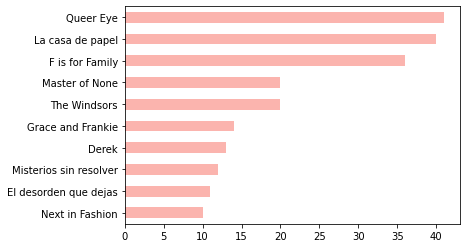

In [27]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(
    ascending=True).tail(10).plot.barh(cmap='Pastel1')

Consultamos datos de Stranger Things

In [28]:
df[df.Title.str.contains('Stranger')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,
2020-01-21,Stranger: Temporada 1: Episodio 2,serie,Stranger,Temporada 1,Episodio 2,None,None,2020,January,21,Tuesday
2019-11-18,Stranger: Temporada 1: Episodio 1,serie,Stranger,Temporada 1,Episodio 1,None,None,2019,November,18,Monday
2019-08-27,Stranger Things: Stranger Things 3: Capítulo o...,serie,Stranger Things,Stranger Things 3,Capítulo ocho,La batalla de Starcourt,None,2019,August,27,Tuesday
2019-08-26,Stranger Things: Stranger Things 3: Capítulo s...,serie,Stranger Things,Stranger Things 3,Capítulo siete,La mordedura,None,2019,August,26,Monday
2019-08-22,Stranger Things: Stranger Things 3: Capítulo s...,serie,Stranger Things,Stranger Things 3,Capítulo seis,E pluribus unum,None,2019,August,22,Thursday
2019-08-20,Stranger Things: Stranger Things 3: Capítulo c...,serie,Stranger Things,Stranger Things 3,Capítulo cinco,El ejército del Azotamentes,None,2019,August,20,Tuesday
2019-08-18,Stranger Things: Stranger Things 3: Capítulo c...,serie,Stranger Things,Stranger Things 3,Capítulo cuatro,La prueba de la sauna,None,2019,August,18,Sunday
2019-08-18,Stranger Things: Stranger Things 3: Capítulo t...,serie,Stranger Things,Stranger Things 3,Capítulo tres,El caso de la socorrista desaparecida,None,2019,August,18,Sunday
2019-08-17,Stranger Things: Stranger Things 3: Capítulo d...,serie,Stranger Things,Stranger Things 3,Capítulo dos,Ratas de centro comercial,None,2019,August,17,Saturday


In [29]:
stranger_df = df[df.Title.str.contains('Stranger')]
stranger_df.tipo.count()
print(f'Rafa, has visto {stranger_df.tipo.count()} episodios ' +
      f'de Strangers Things')

Rafa, has visto 10 episodios de Strangers Things


¿Qué día de la semana suelo ver más series?

<AxesSubplot:>

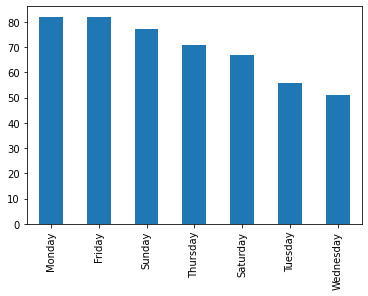

In [30]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind='bar')

¿Existen diferencias en los días entre series y películas?

<AxesSubplot:xlabel='dia_semana', ylabel='count'>

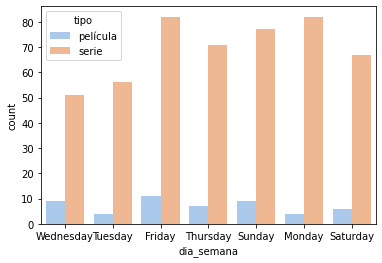

In [31]:
import seaborn as sns

# Analisis multivariante por tipo.
sns.countplot(data=df, x='dia_semana', hue='tipo', palette='pastel')

¿El consumo a lo largo del año es constante o hay meses que consumo más?

<AxesSubplot:>

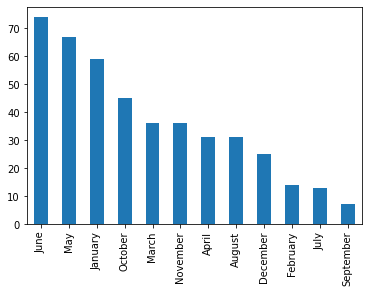

In [32]:
df.loc[df.año < 2021].mes.value_counts().plot.bar()

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix? Comparamos los periodos del 16 de marzo al 21 de junio para los años 2020 y 2021.

<AxesSubplot:>

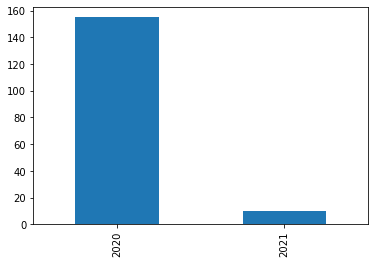

In [33]:
# Slicing del periodo de confinamiento
df_conf_2020 = df[(df.index >= '2020-03-16') & (df.index <= '2020-06-21')]

# Slicing del mismo periodo en 2021
df_conf_2021 = df[(df.index >= '2021-03-16') & (df.index <= '2021-06-21')]

df_conf = pd.concat([df_conf_2020, df_conf_2021], axis=0)

df_conf.año.value_counts().plot.bar()

<AxesSubplot:xlabel='tipo', ylabel='count'>

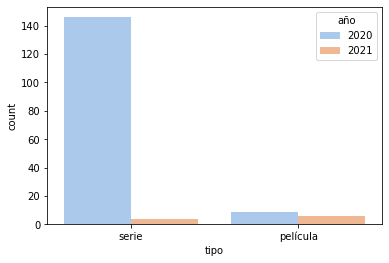

In [34]:
# Analisis multivariante por año y tipo de contenido.
sns.countplot(data=df_conf, x='tipo', hue='año', palette='pastel')